##Import liberaries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Uploading the data

In [ ]:
#Uploading the training and testing data. It is an excel document
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/cervical_cancer.csv'

In [ ]:
df_cancer = pd.read_csv(path)
df_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
df_cancer.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
df_cancer.shape, df_cancer.columns

((858, 36),
 Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
        'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
        'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
        'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
        'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
        'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
        'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
        'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
        'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
        'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
        'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
        'Citology', 'Biopsy'],
       dtype='object'))

##Data Manipulation
1. Remove columns with too many empty data
2. Fill in missing data with the mean
3. Perform data augumentation
4. remove the target column and assign it to a new variable

In [ ]:
df_cancer.dtypes, len(df_cancer.columns)

(Age                                    int64
 Number of sexual partners             object
 First sexual intercourse              object
 Num of pregnancies                    object
 Smokes                                object
 Smokes (years)                        object
 Smokes (packs/year)                   object
 Hormonal Contraceptives               object
 Hormonal Contraceptives (years)       object
 IUD                                   object
 IUD (years)                           object
 STDs                                  object
 STDs (number)                         object
 STDs:condylomatosis                   object
 STDs:cervical condylomatosis          object
 STDs:vaginal condylomatosis           object
 STDs:vulvo-perineal condylomatosis    object
 STDs:syphilis                         object
 STDs:pelvic inflammatory disease      object
 STDs:genital herpes                   object
 STDs:molluscum contagiosum            object
 STDs:AIDS                        

In [ ]:
df_cancer = df_cancer.drop('STDs: Time since last diagnosis', axis=1)

In [ ]:
df_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,?,0,0,0,0,0,0,0,0


In [ ]:
df_cancer = df_cancer.drop('STDs: Time since first diagnosis', axis=1)

In [ ]:
df_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


##Converting some columns from object to float 64

In [ ]:
df_cancer['Number of sexual partners'] = pd.to_numeric(df_cancer['Number of sexual partners'],errors = 'coerce')
df_cancer['First sexual intercourse'] = pd.to_numeric(df_cancer['First sexual intercourse'],errors = 'coerce')
df_cancer['Num of pregnancies'] = pd.to_numeric(df_cancer['Num of pregnancies'],errors = 'coerce')
df_cancer['Smokes'] = pd.to_numeric(df_cancer['Smokes'],errors = 'coerce')
df_cancer['Smokes (years)'] = pd.to_numeric(df_cancer['Smokes (years)'],errors = 'coerce')
df_cancer['Smokes (packs/year)'] = pd.to_numeric(df_cancer['Smokes (packs/year)'],errors = 'coerce')
df_cancer['Hormonal Contraceptives'] = pd.to_numeric(df_cancer['Hormonal Contraceptives'],errors = 'coerce')
df_cancer['Hormonal Contraceptives (years)'] = pd.to_numeric(df_cancer['Hormonal Contraceptives (years)'],errors = 'coerce')
df_cancer['IUD'] = pd.to_numeric(df_cancer['IUD'],errors = 'coerce')
df_cancer['IUD (years)'] = pd.to_numeric(df_cancer['IUD (years)'],errors = 'coerce')
df_cancer['STDs'] = pd.to_numeric(df_cancer['STDs'],errors = 'coerce')
df_cancer['STDs (number)'] = pd.to_numeric(df_cancer['STDs (number)'],errors = 'coerce')
df_cancer['STDs:condylomatosis'] = pd.to_numeric(df_cancer['STDs:condylomatosis'],errors = 'coerce')
df_cancer['STDs:cervical condylomatosis'] = pd.to_numeric(df_cancer['STDs:cervical condylomatosis'],errors = 'coerce')
df_cancer['STDs:vaginal condylomatosis'] = pd.to_numeric(df_cancer['STDs:vaginal condylomatosis'],errors = 'coerce')
df_cancer['STDs:vulvo-perineal condylomatosis'] = pd.to_numeric(df_cancer['STDs:vulvo-perineal condylomatosis'],errors = 'coerce')
df_cancer['STDs:syphilis'] = pd.to_numeric(df_cancer['STDs:syphilis'],errors = 'coerce')
df_cancer['STDs:pelvic inflammatory disease'] = pd.to_numeric(df_cancer['STDs:pelvic inflammatory disease'],errors = 'coerce')
df_cancer['STDs:genital herpes'] = pd.to_numeric(df_cancer['STDs:genital herpes'],errors = 'coerce')
df_cancer['STDs:molluscum contagiosum'] = pd.to_numeric(df_cancer['STDs:molluscum contagiosum'],errors = 'coerce')
df_cancer['STDs:AIDS'] = pd.to_numeric(df_cancer['STDs:AIDS'],errors = 'coerce')
df_cancer['STDs:HIV'] = pd.to_numeric(df_cancer['STDs:HIV'],errors = 'coerce')
df_cancer['STDs:Hepatitis B'] = pd.to_numeric(df_cancer['STDs:Hepatitis B'],errors = 'coerce')
df_cancer['STDs:HPV'] = pd.to_numeric(df_cancer['STDs:HPV'],errors = 'coerce')
df_cancer['STDs: Number of diagnosis'] = pd.to_numeric(df_cancer['STDs: Number of diagnosis'],errors = 'coerce')

In [ ]:
df_cancer.dtypes, len(df_cancer.columns)

(Age                                     int64
 Number of sexual partners             float64
 First sexual intercourse              float64
 Num of pregnancies                    float64
 Smokes                                float64
 Smokes (years)                        float64
 Smokes (packs/year)                   float64
 Hormonal Contraceptives               float64
 Hormonal Contraceptives (years)       float64
 IUD                                   float64
 IUD (years)                           float64
 STDs                                  float64
 STDs (number)                         float64
 STDs:condylomatosis                   float64
 STDs:cervical condylomatosis          float64
 STDs:vaginal condylomatosis           float64
 STDs:vulvo-perineal condylomatosis    float64
 STDs:syphilis                         float64
 STDs:pelvic inflammatory disease      float64
 STDs:genital herpes                   float64
 STDs:molluscum contagiosum            float64
 STDs:AIDS   

##Visualizing the data

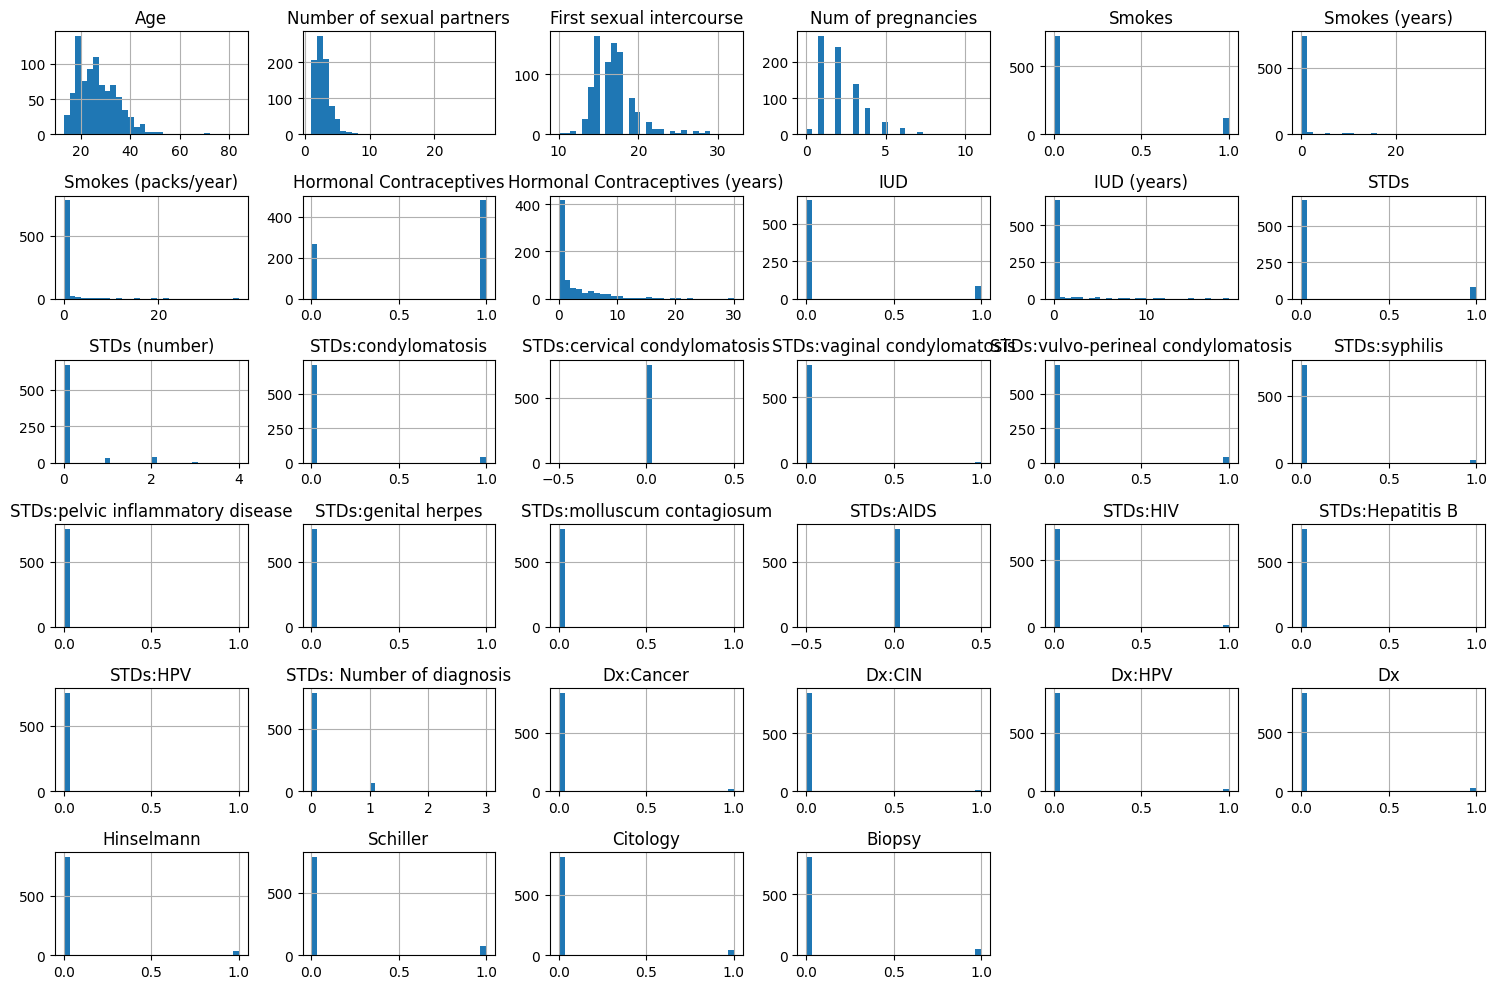

In [ ]:
df_cancer.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

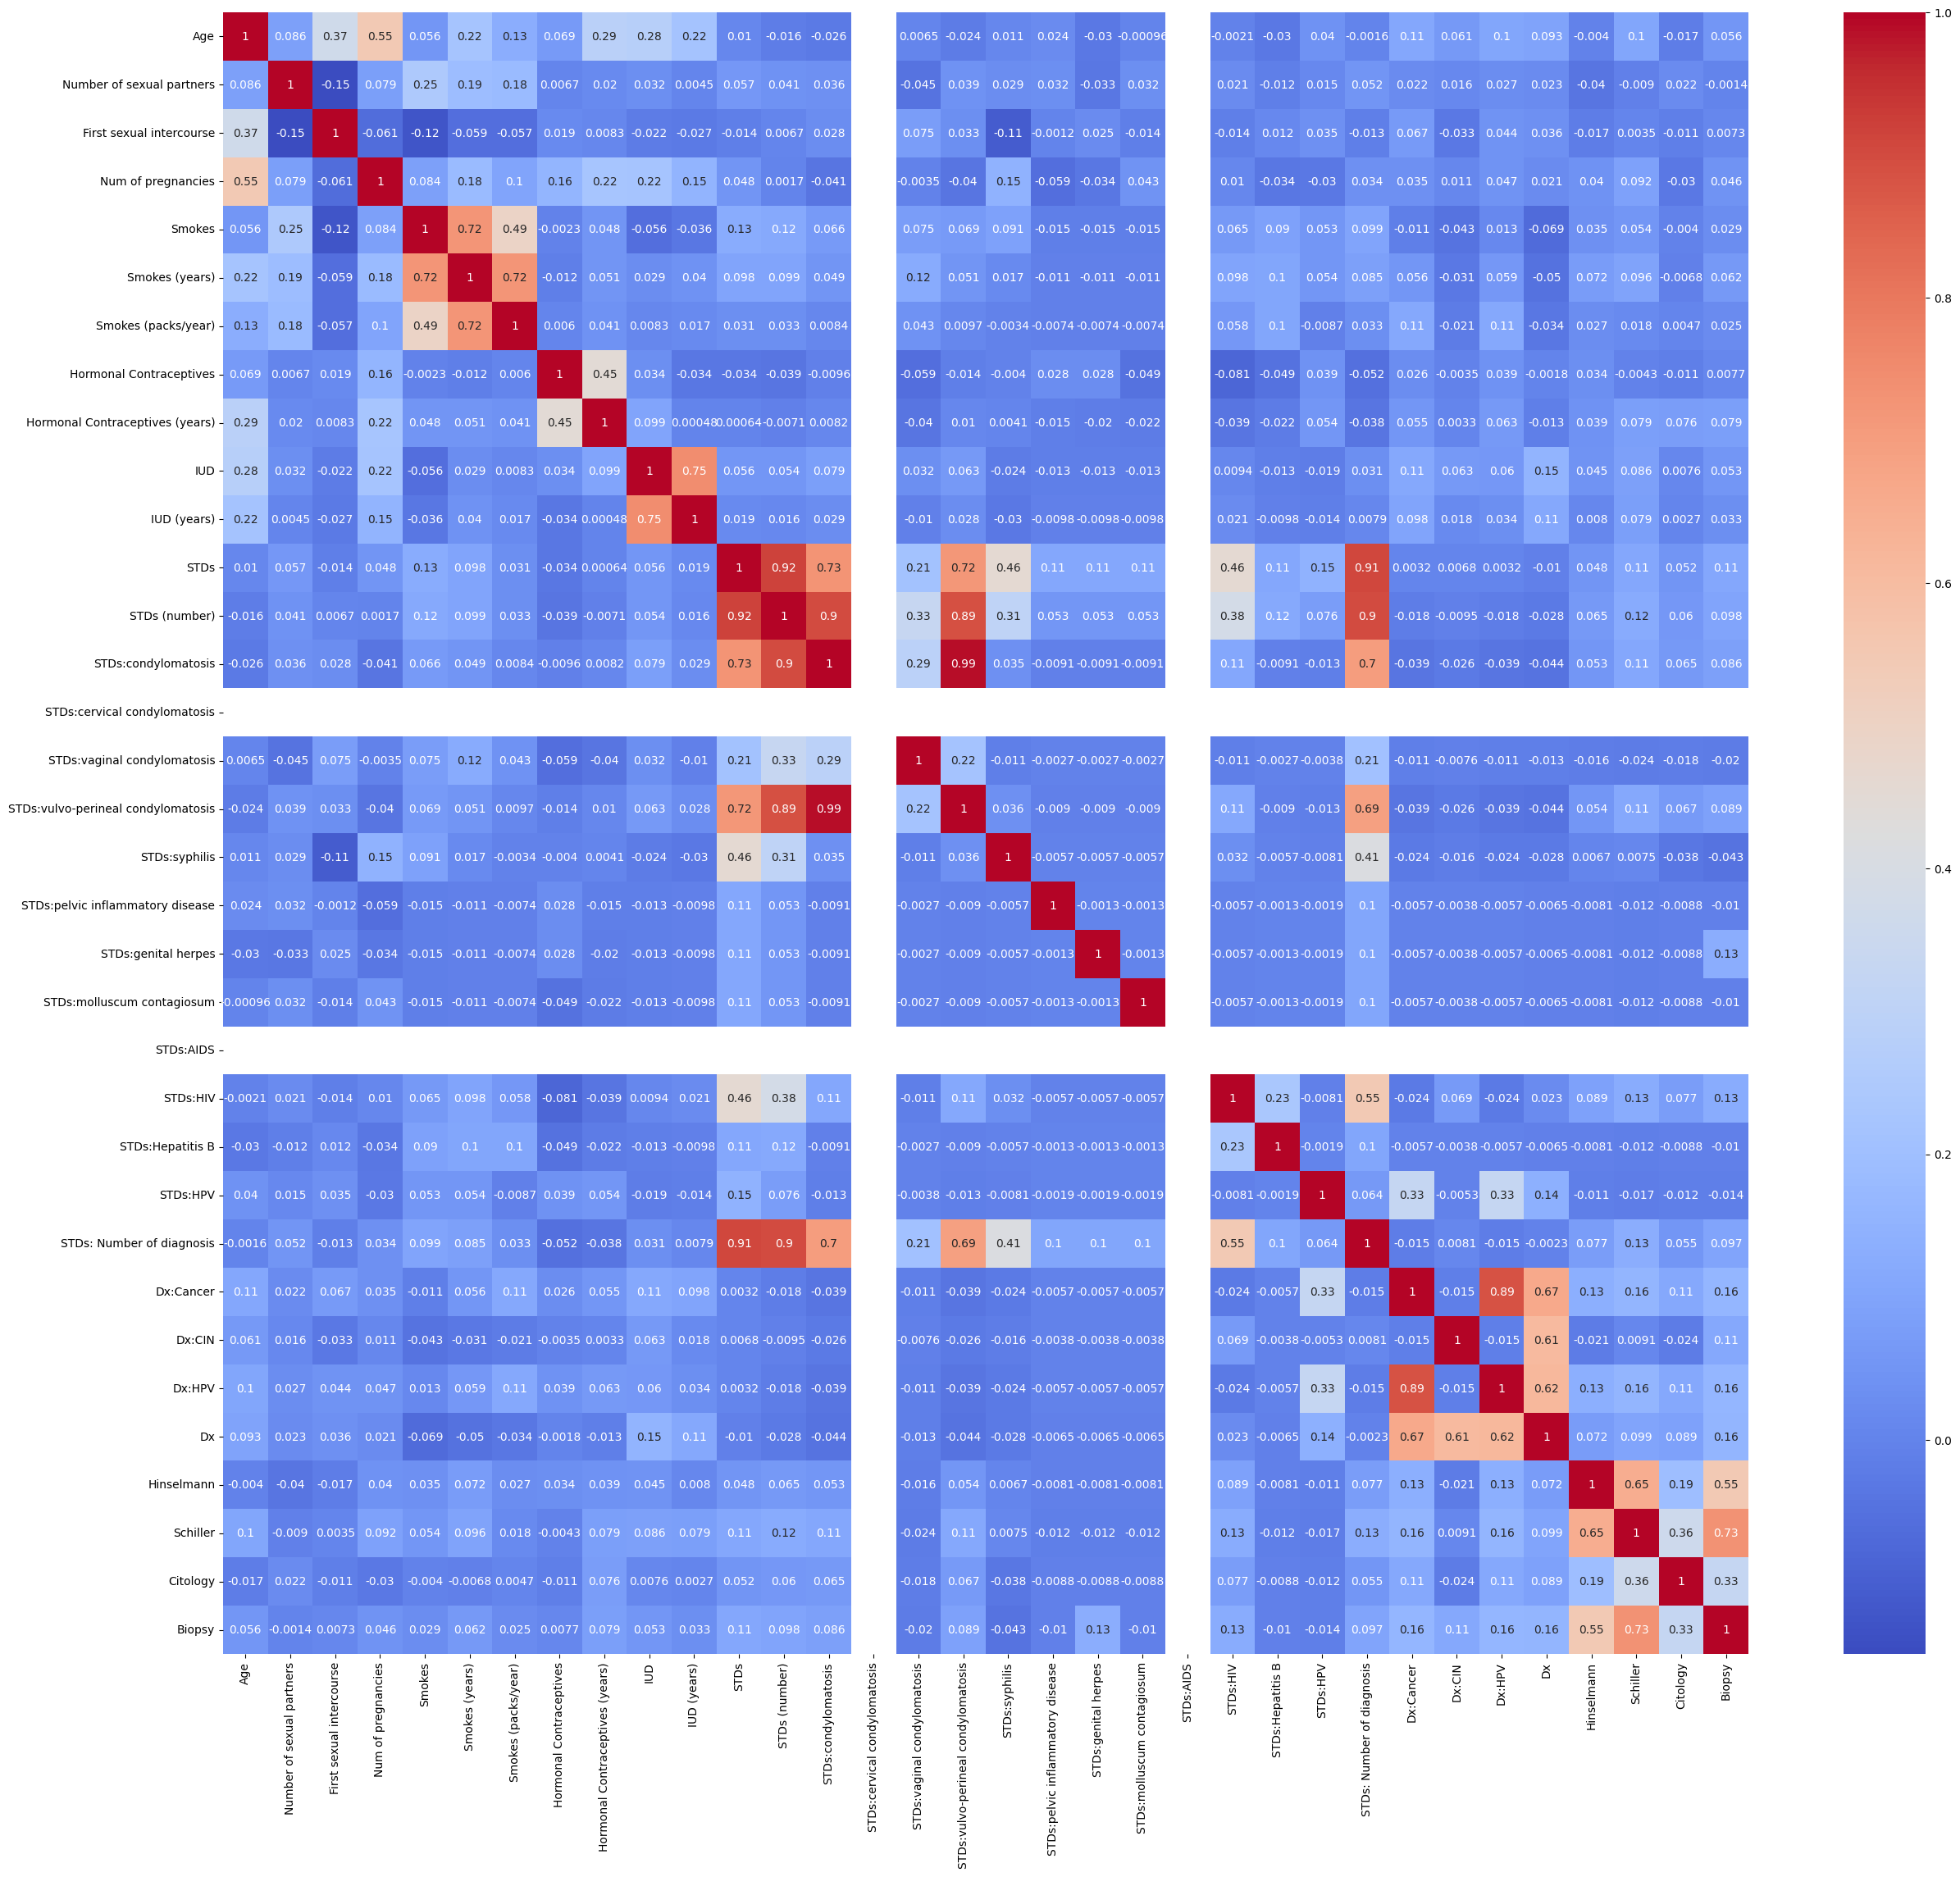

In [ ]:
#Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(30, 26))
sns.heatmap(df_cancer.corr(), annot=True, cmap='coolwarm')
plt.show()

##Split the df_cancer data into training and test data for the model_1

In [ ]:
df_cancer = df_cancer.drop['Dx:Cancer']


##Creating the first model_1

In [ ]:
tf.keras.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(34),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmod')
])
#compile the model
model_1.compile(loss = tf.keras.lossses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = 'accuracy')
#Fit the model
model_1.fit(df_cancer, label)

##Data Augumentation

In [ ]:
#A function to generate synthetic data by adding noise
def generate_synthetic_data(df_cancer, noise_level = 0.1):
  synthetic_df_cancer = df_cancer.copy()
  for col in df_cancer.columns:
    if df_cancer[col].dtype in [np.float64, np.int64]:
      noise = noise_level * np.random.randn(*df_cancer[col].shape)
      synthetic_df_cancer[col] += noise
  return synthetic_df_cancer

In [ ]:
synthetic_df_cancer = generate_synthetic_data(df_cancer, noise_level = 0.1)
synthetic_df_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.026766,4.058462,15.158270,0.953114,-0.038460,0.073995,0.044338,-0.165124,-0.101827,0.019064,...,0.059104,-0.182925,0.043820,-0.161320,-0.065610,0.043944,0.092602,-0.061613,-0.074664,0.128624
1,14.931217,0.874083,13.941480,0.919283,-0.096495,-0.066084,-0.104311,0.010629,0.165741,-0.073530,...,0.008304,-0.023734,-0.036785,0.024835,0.070252,0.022551,0.034545,-0.060567,0.076612,0.159069
2,33.971398,0.904954,NaN,1.128024,0.015226,0.218915,-0.009436,-0.020933,-0.187078,-0.140302,...,0.052360,-0.012098,0.049005,0.143494,-0.030906,-0.115174,-0.131931,-0.026469,-0.111430,0.103443
3,52.030267,5.078610,16.104892,4.045811,0.940755,37.008395,36.852312,0.974346,2.912941,0.063994,...,-0.037531,0.067928,0.830791,-0.100491,1.041752,0.007099,-0.027908,0.036889,0.119072,-0.033739
4,45.765053,2.962224,21.070351,4.261427,0.175396,-0.070203,-0.031565,1.009452,14.907572,-0.012688,...,0.018641,-0.105012,0.049994,-0.009138,-0.286360,0.015597,0.226419,0.119799,0.134281,-0.069973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.047669,3.133899,18.087504,-0.095580,0.115491,-0.035785,-0.149255,-0.034281,0.039057,0.077811,...,0.122980,0.046627,0.086364,-0.007372,-0.050237,-0.100132,0.151042,-0.038716,0.179856,0.057588
854,32.040225,1.992431,19.085029,0.948892,-0.002342,0.060183,-0.058048,1.130984,8.243589,-0.162117,...,-0.025102,0.005010,-0.027444,0.126314,0.077873,-0.068967,0.097059,0.155560,0.067847,0.096860
855,25.073594,2.054892,17.106953,0.139092,0.205390,-0.132855,0.046779,0.720876,0.054912,0.002396,...,-0.110302,0.040832,-0.096414,-0.045592,-0.138588,0.061053,0.158222,-0.157692,0.993637,0.135625
856,32.935000,2.112837,24.059212,1.873472,0.083041,0.053972,-0.097163,1.017250,0.066537,0.015567,...,-0.021409,-0.037580,-0.043720,0.011878,0.155826,-0.091704,0.057115,0.015522,0.003989,0.109174


In [ ]:
#Add a small amount of random noise to the numeric features
def add_noise(df_cancer, noise_level = 0.1):
  noisy_df_cancer = df_cancer.copy()
  for col in df_cancer.select_dtypes(include = [np.number]).columns:
    noise = noise_level * np.random.randn(df_cancer[col].size)
    noisy_df_cancer[col] += noise
  return noisy_df_cancer

In [ ]:
noisy_df_cancer = add_noise(df_cancer, noise_level = 0.1)
noisy_df_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.002121,4.027588,15.050336,0.903710,-0.018977,-0.084544,0.066191,-0.033803,-0.070011,-0.028437,...,0.089678,-0.112939,-0.089070,-0.103527,-0.181502,0.055031,0.126842,-0.081871,-0.078999,0.120749
1,15.132998,0.988703,13.846992,1.147179,-0.077215,-0.095397,-0.117849,-0.133771,-0.225159,-0.175660,...,0.138991,0.025150,-0.024200,-0.077572,-0.048758,-0.004527,0.132772,-0.111928,-0.098622,0.031018
2,34.056525,1.048914,NaN,1.033563,0.154454,0.020073,0.044741,0.040047,0.004742,0.049272,...,-0.053377,0.051696,0.019155,-0.130196,0.112343,-0.146123,-0.217539,0.009848,0.064452,-0.100010
3,52.036960,4.935121,16.002915,3.983098,0.880960,37.012837,36.994842,0.892703,2.944657,-0.019618,...,-0.228423,-0.034175,1.028866,0.148089,1.009267,-0.013266,0.136194,-0.123777,-0.045736,0.021481
4,45.962426,3.040067,20.899837,3.852870,-0.052788,0.086426,0.003926,1.000154,14.959296,-0.152261,...,-0.019234,-0.105550,-0.164531,-0.031056,0.079536,-0.052018,-0.057145,0.107535,-0.107413,0.055494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,33.983529,3.156930,17.923799,0.093858,0.000492,0.089398,-0.098042,-0.052954,-0.081127,0.009337,...,-0.049414,-0.094419,-0.066831,-0.083655,0.095796,-0.016504,-0.013403,0.258126,0.031589,-0.042270
854,32.137283,1.962025,19.084276,1.030704,-0.064709,-0.020400,0.135274,1.019225,7.962846,-0.179151,...,0.087788,0.002882,-0.092843,-0.115687,0.116954,0.030304,-0.096586,-0.126683,-0.021048,-0.025670
855,24.933768,1.927567,16.924893,-0.172397,0.018166,-0.115609,-0.028299,0.897216,0.053457,0.113134,...,-0.058840,-0.032181,0.261394,-0.179154,-0.082870,-0.115278,0.051446,-0.027481,1.006646,-0.149148
856,32.831435,2.093317,24.100555,1.966698,0.088379,-0.059164,-0.002931,0.978242,-0.037805,0.028607,...,0.012967,0.129886,0.052574,-0.129828,0.053294,-0.111669,0.108144,-0.074301,-0.027196,0.093989


In [ ]:
#Combining existing features to create new features
df_cancer_combined = pd.concat([df_cancer, synthetic_df_cancer, noisy_df_cancer])
df_cancer_combined

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.000000,4.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,15.000000,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,34.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,52.000000,5.000000,16.000000,4.000000,1.000000,37.000000,37.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,46.000000,3.000000,21.000000,4.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,33.983529,3.156930,17.923799,0.093858,0.000492,0.089398,-0.098042,-0.052954,-0.081127,0.009337,...,-0.049414,-0.094419,-0.066831,-0.083655,0.095796,-0.016504,-0.013403,0.258126,0.031589,-0.042270
854,32.137283,1.962025,19.084276,1.030704,-0.064709,-0.020400,0.135274,1.019225,7.962846,-0.179151,...,0.087788,0.002882,-0.092843,-0.115687,0.116954,0.030304,-0.096586,-0.126683,-0.021048,-0.025670
855,24.933768,1.927567,16.924893,-0.172397,0.018166,-0.115609,-0.028299,0.897216,0.053457,0.113134,...,-0.058840,-0.032181,0.261394,-0.179154,-0.082870,-0.115278,0.051446,-0.027481,1.006646,-0.149148
856,32.831435,2.093317,24.100555,1.966698,0.088379,-0.059164,-0.002931,0.978242,-0.037805,0.028607,...,0.012967,0.129886,0.052574,-0.129828,0.053294,-0.111669,0.108144,-0.074301,-0.027196,0.093989
